In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
cols = [
    # "#52952c",
    "#80d358",
    "#328dee",
    "#d7a532",
    "#d5702e",
    "#b166d0"
]
cmap = lambda i: cols[i]

In [3]:
df = pd.read_csv('full_results.csv')

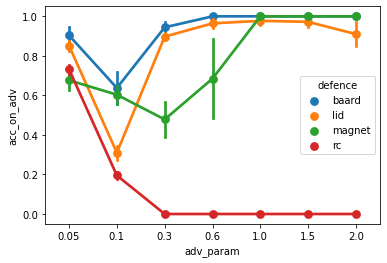

In [4]:
data = df[(df['data'] == 'banknote') & (df['model'] == 'dnn') & (df['attack'] == 'apgd')]
s1 = sns.pointplot(x='adv_param', y='acc_on_adv', hue='defence', data=data, ci='sd')

In [9]:
def plot_att(data_name, model, attacks):
    for att in attacks:
        sns.set_style('ticks')
        sns.set_context('paper')
        fig = plt.figure(figsize=(8,4))
        gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
        gs.update(hspace=0.05)

        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[1])
        m = ['^', '^', 'o', '*', 'D', 's']
        l = [':', '-', ':', ':', ':', ':']
        # p = 'Set2'
        p = cols

        data = df[(df['data'] == data_name) & (df['model'] == model) & (df['attack'] == att)]

        s1 = sns.pointplot(x='adv_param', y='acc_on_adv', hue='defence', data=data, ax=ax0, ci='sd', palette=p)
        s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
        s1.legend_.remove()

        s2 = sns.pointplot(x='adv_param', y='fpr', hue='defence', data=data, ax=ax1, ci='sd', palette=p)
        s2.set(ylabel="FPR", xlabel=att.upper() +' with Epsilon')

        plt.legend(bbox_to_anchor=(0., 3.4, 1., .102), loc='upper center', ncol=6, mode="expand" , borderaxespad=0.5)

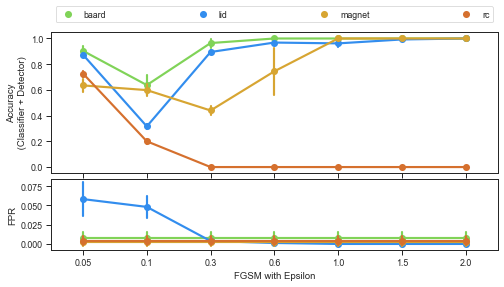

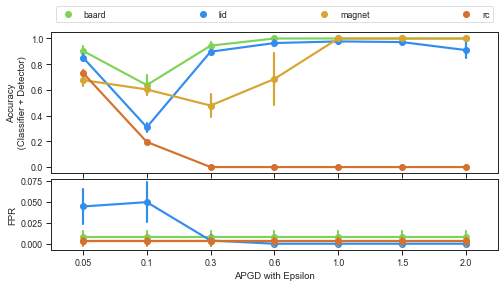

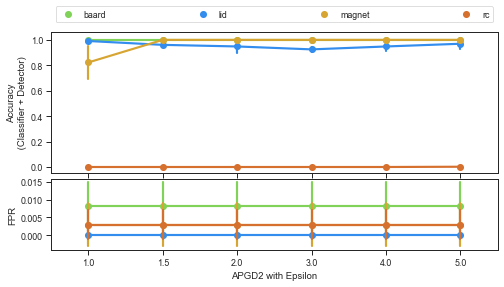

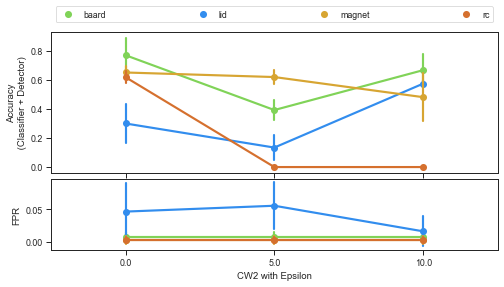

In [10]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2']
plot_att('banknote', 'dnn', attacks)

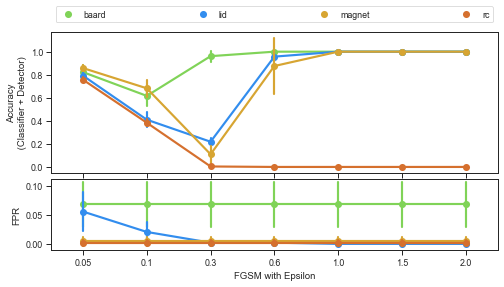

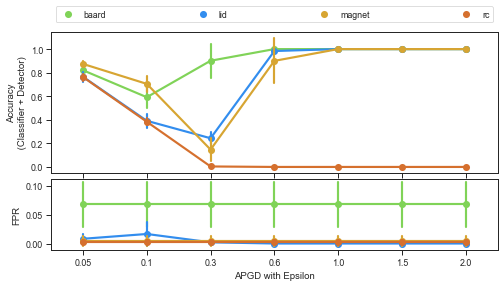

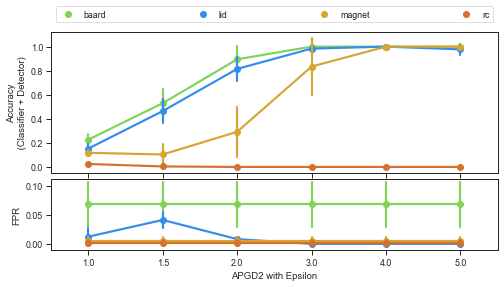

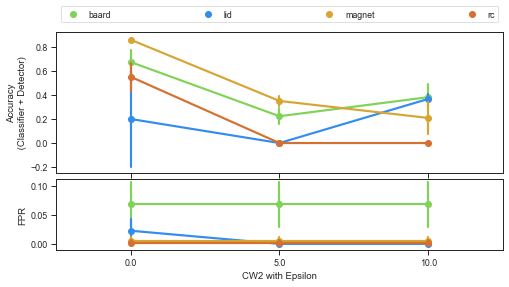

In [11]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2']
plot_att('breastcancer', 'dnn', attacks)

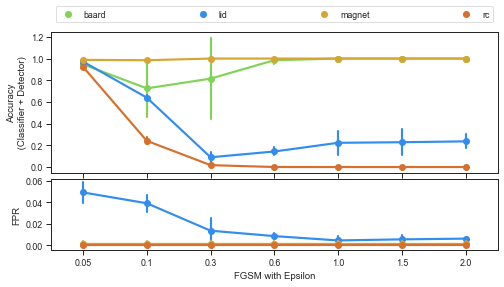

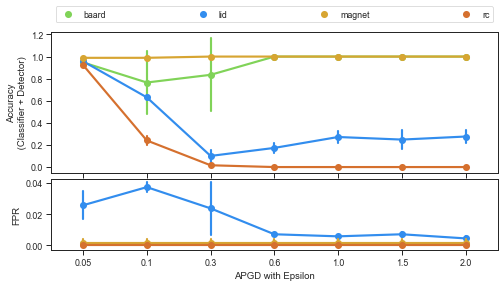

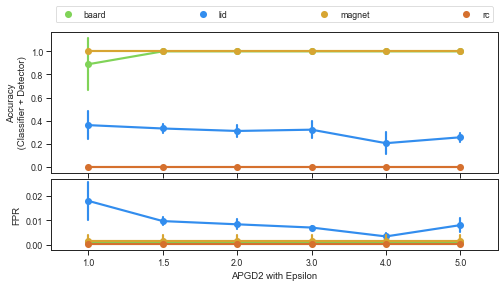

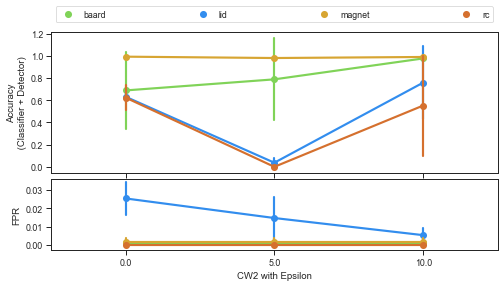

In [13]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2']
plot_att('htru2', 'dnn', attacks)

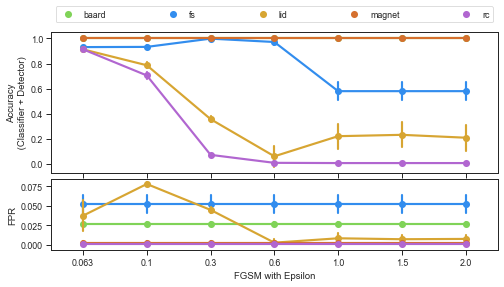

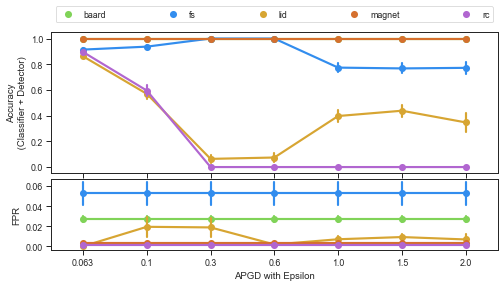

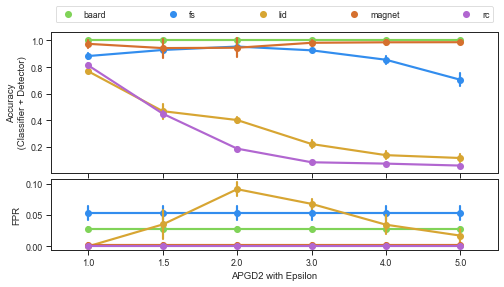

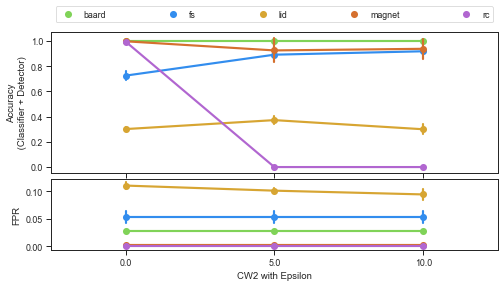

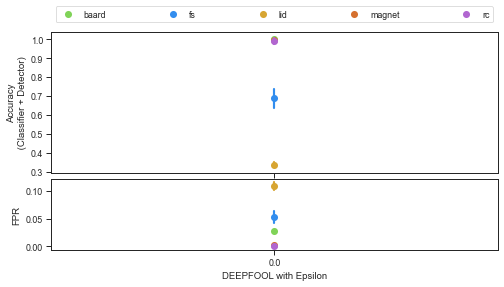

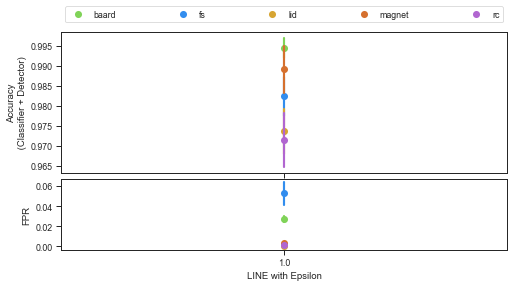

In [14]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2', 'deepfool', 'line']
plot_att('mnist', 'dnn', attacks)

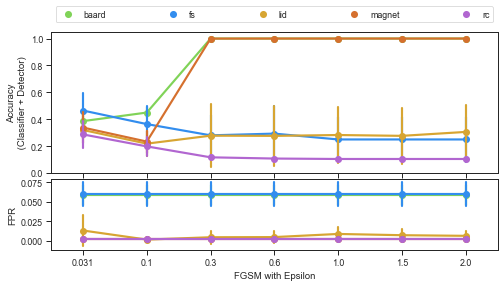

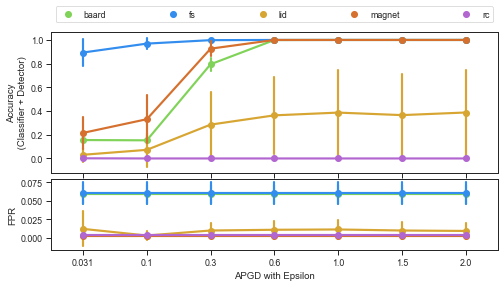

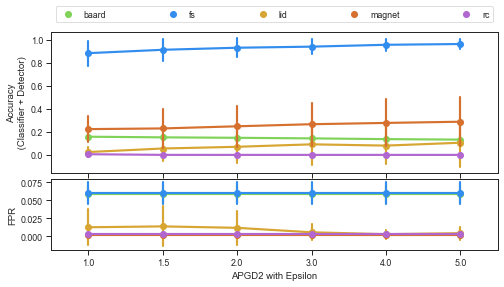

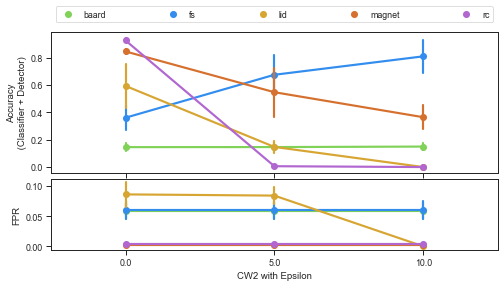

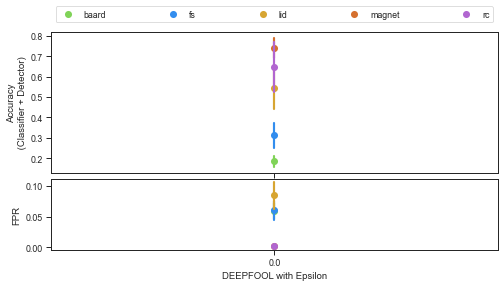

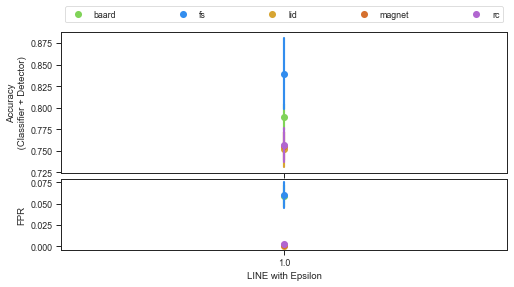

In [15]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2', 'deepfool', 'line']
plot_att('cifar10', 'resnet', attacks)

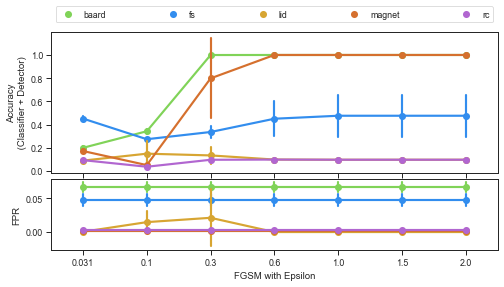

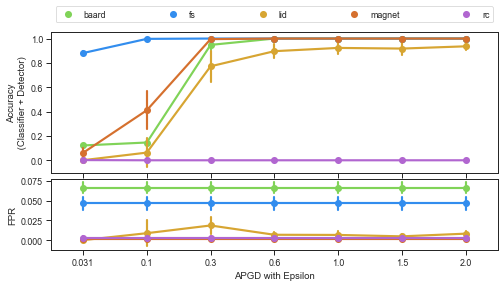

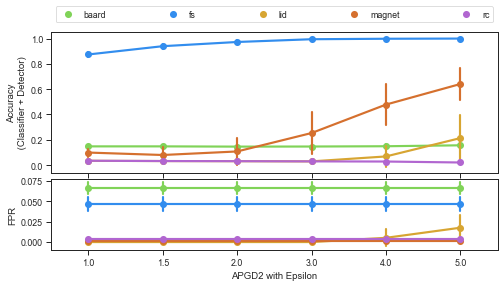

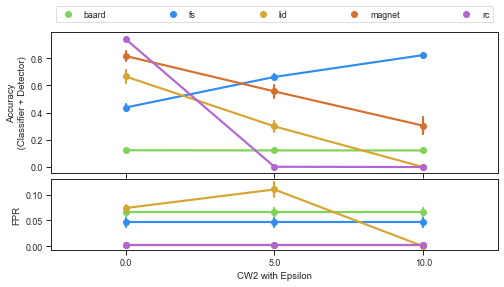

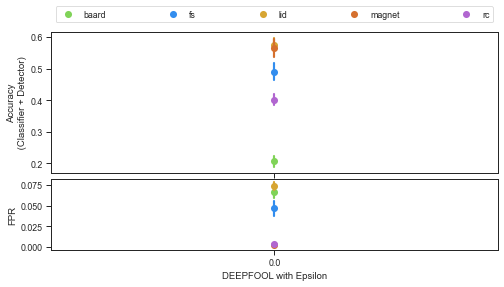

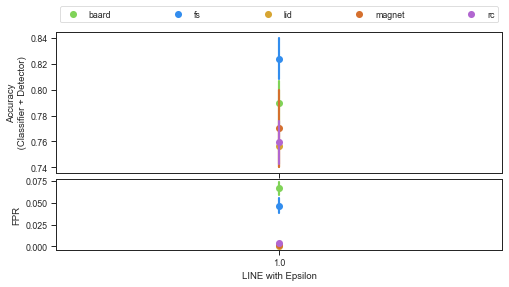

In [16]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2', 'deepfool', 'line']
plot_att('cifar10', 'vgg', attacks)